# Feature Engineering Assignment

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("titanic.csv")
print("Original DataFrame with Missing Values:")
print(df)

Original DataFrame with Missing Values:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                           

## Handling Missing Values

In [2]:
print(df.isnull().sum())  # Shows count of missing values per column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
# Remove missing values

# Drop rows with any missing values
df_dropped_rows = df.dropna()
print("\nDataFrame after dropping rows with missing values:")
print(df_dropped_rows)


DataFrame after dropping rows with missing values:
     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..               

In [5]:
# Impute missing values with the mean
df_mean = df
df_mean['Age'].fillna(df_mean['Age'].mean(), inplace=True)

print("\nDataFrame after imputing numerical columns with mean:")
print(df_mean)

C:\Users\manu2\AppData\Local\Temp\ipykernel_2420\2030353583.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean['Age'].fillna(df_mean['Age'].mean(), inplace=True)



DataFrame after imputing numerical columns with mean:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                        

In [6]:
print(df.isnull().sum())  # Shows count of missing values per column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
df_cleaned = df.dropna(subset=['Embarked'])

In [8]:
print(df_cleaned.isnull().sum())  # Shows count of missing values per column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


#### Handling missing values that is not numeric i.e mean,median,mode fails.

In [9]:
df_cleaned['Cabin'] = df_cleaned['Cabin'].str.split().str[0]

C:\Users\manu2\AppData\Local\Temp\ipykernel_2420\3060789380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cabin'] = df_cleaned['Cabin'].str.split().str[0]


In [10]:
print(df_cleaned)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

In [11]:
print(df_cleaned.isnull().sum())  # Shows count of missing values per column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


#### Saving updated data

In [12]:
df_cleaned.to_csv('titanic1.csv', index=False)

In [15]:
df_cleaned = pd.read_csv("titanic1.csv")

#### Completing data handling and saving

In [23]:

# Function to impute Cabin based on similar passengers
def impute_cabin(row):
    if pd.notna(row['Cabin']):
        return row['Cabin']
    
    # Find passengers with similar class and fare
    similar = df_cleaned[
        (df_cleaned['Pclass'] == row['Pclass']) & 
        (df_cleaned['Cabin'].notna()) &
        (df_cleaned['Fare'].between(row['Fare'] - 20, row['Fare'] + 20))
    ]
    
    if len(similar) > 0:
        # Randomly pick from similar passengers
        return np.random.choice(similar['Cabin'].values)
    else:
        # Fallback: random from same class
        same_class = df_cleaned[(df_cleaned['Pclass'] == row['Pclass']) & (df_cleaned['Cabin'].notna())]
        if len(same_class) > 0:
            return np.random.choice(same_class['Cabin'].values)
        else:
            return 'Unknown'

df_cleaned['Cabin'] = df_cleaned.apply(impute_cabin, axis=1)

# Save
df_cleaned.to_csv('titanic-handledmissingvalue.csv', index=False)

#### Updating dataset with handled data

In [19]:
df = df_cleaned

In [20]:
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
884          887         0       2   
885          888         1       1   
886          889         0       3   
887          890         1       1   
888          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
884 

## -------------

## Handle Categorical Value

In [22]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df.to_csv('titanic-handledcategory.csv', index=False)

## Scale the features

##### Feature scaling means converting all your numerical features to a similar range or scale.Models like KNN, SVM, Neural Networks, Logistic Regression are affected by feature scale. Large values dominate small values.After scaling, all features will be in a similar range (e.g., 0-1 or -1 to 1).


In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
# --- Scale Age with Min-Max Scaler (0-1) ---
minmax_scaler = MinMaxScaler()
df['Age'] = minmax_scaler.fit_transform(df[['Age']])

# --- Scale Fare with Standard Scaler (mean=0, std=1) ---
standard_scaler = StandardScaler()
df['Fare'] = standard_scaler.fit_transform(df[['Fare']])

#### Notice:

#### Age: 0-1 range (Min-Max)
#### Fare: Around -1 to 2 (Standardized, mean≈0)

In [25]:
df.to_csv('titanic-scaled.csv', index=False)

In [27]:
# Display with limited decimals for readability(Actual values are unchanged)
pd.set_option('display.precision', 4)

print("Displaying with 4 decimal places:")

print(df)

# The actual values in memory are still full precision
# This only affects how they're displayed

Displaying with 4 decimal places:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
884          887         0       2   
885          888         1       1   
886          889         0       3   
887          890         1       1   
888          891         0       3   

                                                  Name  Sex     Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  0.2712      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  0.4722      1   
2                               Heikkinen, Miss. Laina    1  0.3214      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.4345      1   
4                             Allen, Mr. William Henry    0  0.4345      0   
..                                       

## Remove Outliers

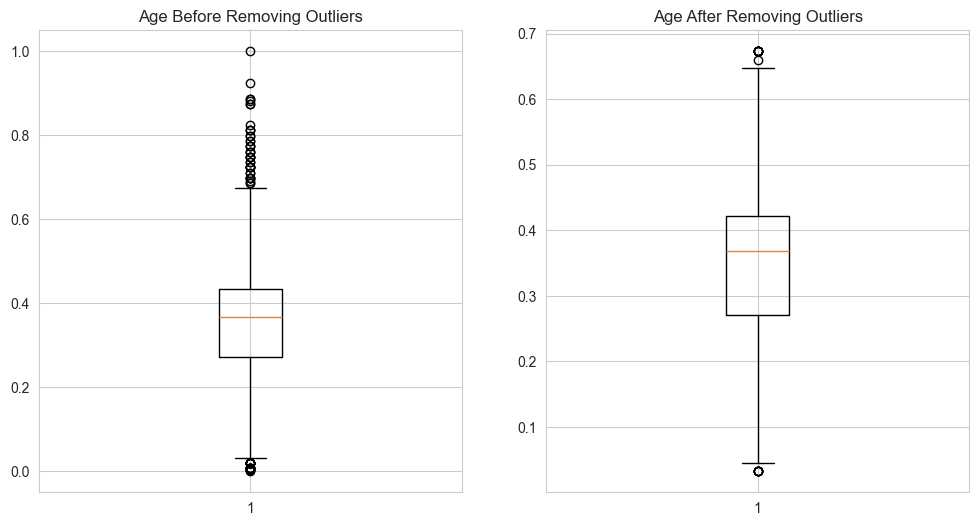

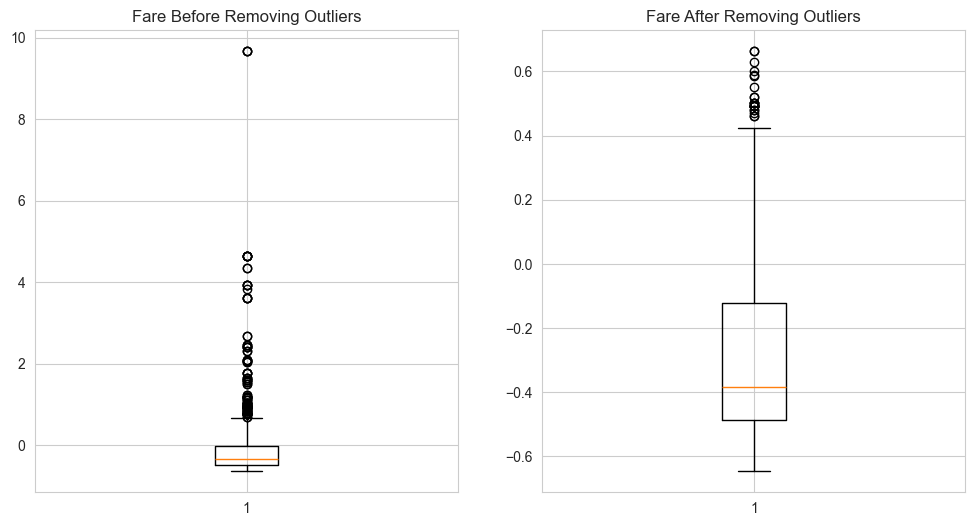

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Convert to DataFrame
df = pd.read_csv('titanic-scaled.csv')
# Calculate Q1, Q3, and IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# Plot before and after removing outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.boxplot(df['Age'])
ax1.set_title("Age Before Removing Outliers")

ax2.boxplot(df_filtered['Age'])
ax2.set_title("Age After Removing Outliers")

plt.show()



# Calculate Q1, Q3, and IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

# Plot before and after removing outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.boxplot(df['Fare'])
ax1.set_title("Fare Before Removing Outliers")

ax2.boxplot(df_filtered['Fare'])
ax2.set_title("Fare After Removing Outliers")

plt.show()
df_filtered.to_csv('titanic-outliersremoved.csv', index=False)

In [39]:
df = df_filtered

In [40]:
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
..           ...       ...     ...   
884          887         0       2   
885          888         1       1   
886          889         0       3   
887          890         1       1   
888          891         0       3   

                                             Name  Sex     Age  SibSp  Parch  \
0                         Braund, Mr. Owen Harris    0  0.2712      1      0   
2                          Heikkinen, Miss. Laina    1  0.3214      0      0   
3    Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.4345      1      0   
4                        Allen, Mr. William Henry    0  0.4345      0      0   
5                                Moran, Mr. James    0  0.3679      0      0   
..                                            ...  ...     ... 

## Feature Selection

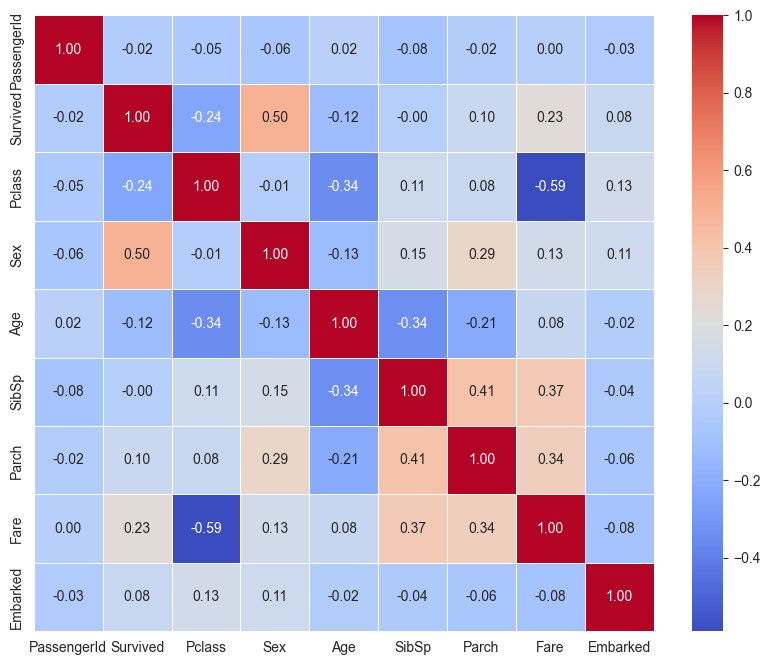

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Best alpha: 0.00011042403746097803
Selected features: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('titanic-outliersremoved.csv')
# Calculate correlation matrix
corr_matrix = df.select_dtypes(include='number').corr()


# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()

# Drop highly correlated features (e.g., correlation > 0.9)
corr_threshold = 0.9
to_drop = [column for column in corr_matrix.columns if any(abs(corr_matrix[column]) > corr_threshold)]
print(to_drop)



from sklearn.linear_model import LassoCV 
from sklearn.model_selection import train_test_split
# Create a LassoCV model
lasso = LassoCV(cv=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit the model to the training data
lasso.fit(X_train, y_train)


# Print the best alpha value chosen by cross-validation
print(f"Best alpha: {lasso.alpha_}")
# Get the features selected by Lasso
selected_features = X.columns[lasso.coef_ != 0]
print(f"Selected features: {selected_features}")

## PCA

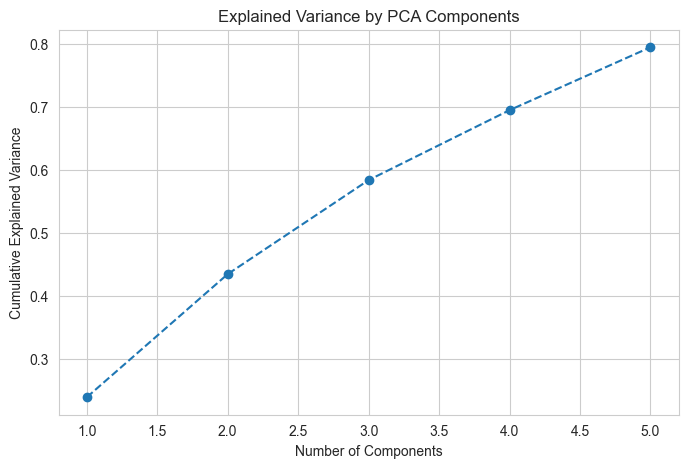

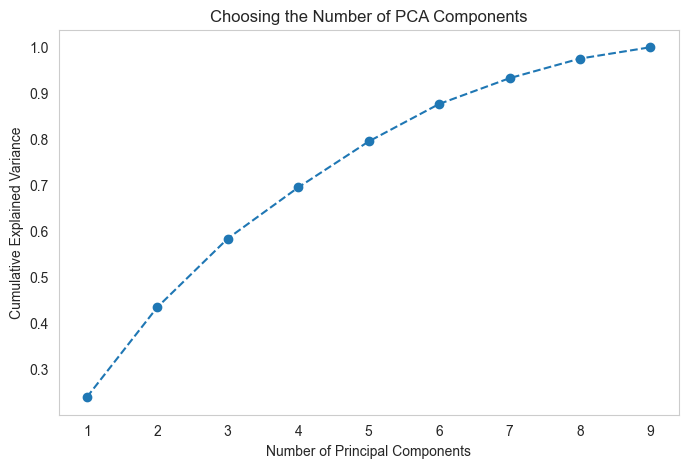

Optimal number of components: 8


,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",np.int64(8)
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for rando

In [49]:
import pandas as pd

# Load the dataset
df = pd.read_csv("titanic-outliersremoved.csv") 

from sklearn.preprocessing import StandardScaler

# Selecting numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # We can also use "median" or "most_frequent"
scaled_data = imputer.fit_transform(scaled_data)



# manually 
from sklearn.decomposition import PCA

# Choose the number of components
pca = PCA(n_components=5)  # Adjust based on variance explained
pca_features = pca.fit_transform(scaled_data)

# Convert to DataFrame
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(5)])


import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_

# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()

# automate the n component

from sklearn.decomposition import PCA
import numpy as np

# Apply PCA without specifying components (to analyze all)
pca = PCA()
pca.fit(scaled_data)

# Calculate cumulative variance explained
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing the Number of PCA Components")
plt.grid()
plt.show()

# Find the number of components that explain at least 95% variance
optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")


pca = PCA(n_components=optimal_components)
pca

## THE END